# ДЗ 7. Детектирование объектов

Используя файл Web7.ipynb попробуйте обучить нейронную сеть YOLOv3 из ImageAI на любом датасете.  
Можете взять один из этих наборов данных:  
https://www.kaggle.com/brendan45774/chess-piece-dectection/  
https://www.kaggle.com/mbkinaci/fruit-images-for-object-detection  
https://www.kaggle.com/sshikamaru/car-object-detection  
https://www.kaggle.com/lplenka/coco-car-damage-detection-dataset

Выбран датасет: https://www.kaggle.com/brendan45774/chess-piece-dectection/

In [4]:
!pip install imageai

In [5]:
import numpy as np
import tensorflow as tf
from pathlib import Path
from PIL import Image
import os
import shutil

from imageai.Detection.Custom import DetectionModelTrainer
from imageai.Detection.Custom import CustomObjectDetection

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Загружаем данные
root_annots_path = '/content/drive/My Drive/Colab-Notebooks/data/chess/annotations/'
root_images_path = '/content/drive/My Drive/Colab-Notebooks/data/chess/images/'

annots_path = sorted([i for i in Path(root_annots_path).glob('*.xml')])
images_path = sorted([i for i in Path(root_images_path).glob('*.png')])

n_imgs = len(images_path)
n_imgs

81

In [7]:
# Определяем классы
classes = np.array(['white-pawn', 'black-pawn', 'white-bishop', 'black-bishop', 'white-knight', 'black-knight', 
                    'white-king', 'black-king', 'white-queen', 'black-queen', 'white-rook', 'black-rook'])

In [8]:
from imageai.Detection import ObjectDetection

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath('/content/drive/My Drive/Colab-Notebooks/data/chess/yolov3.h5')
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image='/content/drive/My Drive/Colab-Notebooks/data/chess/images/chess0.png',
                                             output_image_path='/content/drive/My Drive/Colab-Notebooks/data/chess/detected.png',
                                             minimum_percentage_probability=30)

for eachObject in detections:
    print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
    print("--------------------------------")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


bottle  :  39.340853691101074  :  [42, 123, 125, 219]
--------------------------------
bottle  :  45.077115297317505  :  [88, 100, 133, 155]
--------------------------------


In [10]:
os.makedirs('/content/drive/My Drive/Colab-Notebooks/data/chess/train/images', exist_ok=True)
os.makedirs('/content/drive/My Drive/Colab-Notebooks/data/chess/train/annotations', exist_ok=True)

os.makedirs('/content/drive/My Drive/Colab-Notebooks/data/chess/validation/images', exist_ok=True)
os.makedirs('/content/drive/My Drive/Colab-Notebooks/data/chess/validation/annotations', exist_ok=True)

os.makedirs('/content/drive/My Drive/Colab-Notebooks/data/chess/test/images', exist_ok=True)
os.makedirs('/content/drive/My Drive/Colab-Notebooks/data/chess/test/annotations', exist_ok=True)

In [11]:
# делим картинки на тест, валидацию и трейн
n_split = n_imgs // 20

for i, (annot_path, img_path) in enumerate(zip(annots_path, images_path)):    
    if i > n_imgs:
        break
    # train-val-test split
    if i < n_split:
        shutil.copy(img_path, '/content/drive/My Drive/Colab-Notebooks/data/chess/test/images/' + img_path.parts[-1])
        shutil.copy(annot_path, '/content/drive/My Drive/Colab-Notebooks/data/chess/test/annotations/' + annot_path.parts[-1])
    elif n_split <= i < n_split*5:
        shutil.copy(img_path, '/content/drive/My Drive/Colab-Notebooks/data/chess/validation/images/' + img_path.parts[-1])
        shutil.copy(annot_path, '/content/drive/My Drive/Colab-Notebooks/data/chess/validation/annotations/' + annot_path.parts[-1])
    else:
        shutil.copy(img_path, '/content/drive/My Drive/Colab-Notebooks/data/chess/train/images/' + img_path.parts[-1])
        shutil.copy(annot_path, '/content/drive/My Drive/Colab-Notebooks/data/chess/train/annotations/' + annot_path.parts[-1])

In [12]:
print('test: ', len(list(Path('/content/drive/My Drive/Colab-Notebooks/data/chess/test/annotations/').glob('*.xml'))))
print('val: ', len(list(Path('/content/drive/My Drive/Colab-Notebooks/data/chess/validation/annotations/').glob('*.xml'))))
print('train: ', len(list(Path('/content/drive/My Drive/Colab-Notebooks/data/chess/train/annotations/').glob('*.xml'))))

test:  4
val:  16
train:  61


In [15]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory='/content/drive/My Drive/Colab-Notebooks/data/chess/')
trainer.setTrainConfig(object_names_array=classes,
                       batch_size=8,
                       num_experiments=1,
                       train_from_pretrained_model='/content/drive/My Drive/Colab-Notebooks/data/chess/yolov3.h5')

trainer.trainModel()

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.80
Anchor Boxes generated.
Detection configuration saved in  /content/drive/My Drive/Colab-Notebooks/data/chess/json/detection_config.json
Evaluating over 16 samples taken from /content/drive/My Drive/Colab-Notebooks/data/chess/validation
Training over 61 samples  given at /content/drive/My Drive/Colab-Notebooks/data/chess/train
Training on: 	['black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']
Training with Batch Size:  8
Number of Training Samples:  61
Number of Validation Samples:  16
Number of Experiments:  1
Training with transfer learning from pretrained Model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


64/64 [==============================] - 64s 945ms/step - loss: 125.1745 - yolo_layer_3_loss: 20.0601 - yolo_layer_4_loss: 32.1063 - yolo_layer_5_loss: 61.4320 - val_loss: 147.0772 - val_yolo_layer_3_loss: 17.8554 - val_yolo_layer_4_loss: 39.0172 - val_yolo_layer_5_loss: 78.6268


In [16]:
# извлекаем путь к последней модели
model_path = sorted(list(Path('/content/drive/My Drive/Colab-Notebooks/data/chess/models/').iterdir()))[-1]
model_path

PosixPath('/content/drive/My Drive/Colab-Notebooks/data/chess/models/detection_model-ex-001--loss-0125.174.h5')

In [17]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory='/content/drive/My Drive/Colab-Notebooks/data/chess/')
metrics = trainer.evaluateModel(model_path=model_path,
                                json_path='/content/drive/My Drive/Colab-Notebooks/data/chess/json/detection_config.json',
                                iou_threshold=0.2,
                                object_threshold=0.3,
                                nms_threshold=0.5)

Starting Model evaluation....
Evaluating over 16 samples taken from /content/drive/My Drive/Colab-Notebooks/data/chess/validation
Training over 61 samples  given at /content/drive/My Drive/Colab-Notebooks/data/chess/train
Model File:  /content/drive/My Drive/Colab-Notebooks/data/chess/models/detection_model-ex-001--loss-0125.174.h5 

Evaluation samples:  16
Using IoU:  0.2
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
black-bishop: 0.0001
black-king: 0.0000
black-knight: 0.0000
black-pawn: 0.0000
black-queen: 0.0000
black-rook: 0.0000
white-bishop: 0.0000
white-king: 0.0000
white-knight: 0.0000
white-pawn: 0.0000
white-queen: 0.0000
white-rook: 0.0000
mAP: 0.0000


In [19]:
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(model_path)
detector.setJsonPath('/content/drive/My Drive/Colab-Notebooks/data/chess/json/detection_config.json')
detector.loadModel()
detections = detector.detectObjectsFromImage(minimum_percentage_probability=50,
                                             input_image='/content/drive/My Drive/Colab-Notebooks/data/chess/validation/images/chess26.png',
                                             output_image_path='/content/drive/My Drive/Colab-Notebooks/data/chess/detected.jpg')
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [20]:
input_image='/content/drive/My Drive/Colab-Notebooks/data/chess/test/images/chess0.png'
output_image='/content/drive/My Drive/Colab-Notebooks/data/chess/test/images/detected.jpg'

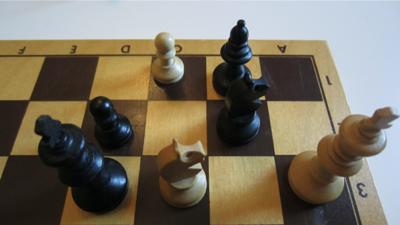

In [21]:
Image.open(input_image)

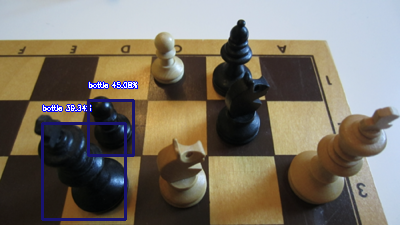

In [25]:
Image.open(output_image)